In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
from math import sqrt

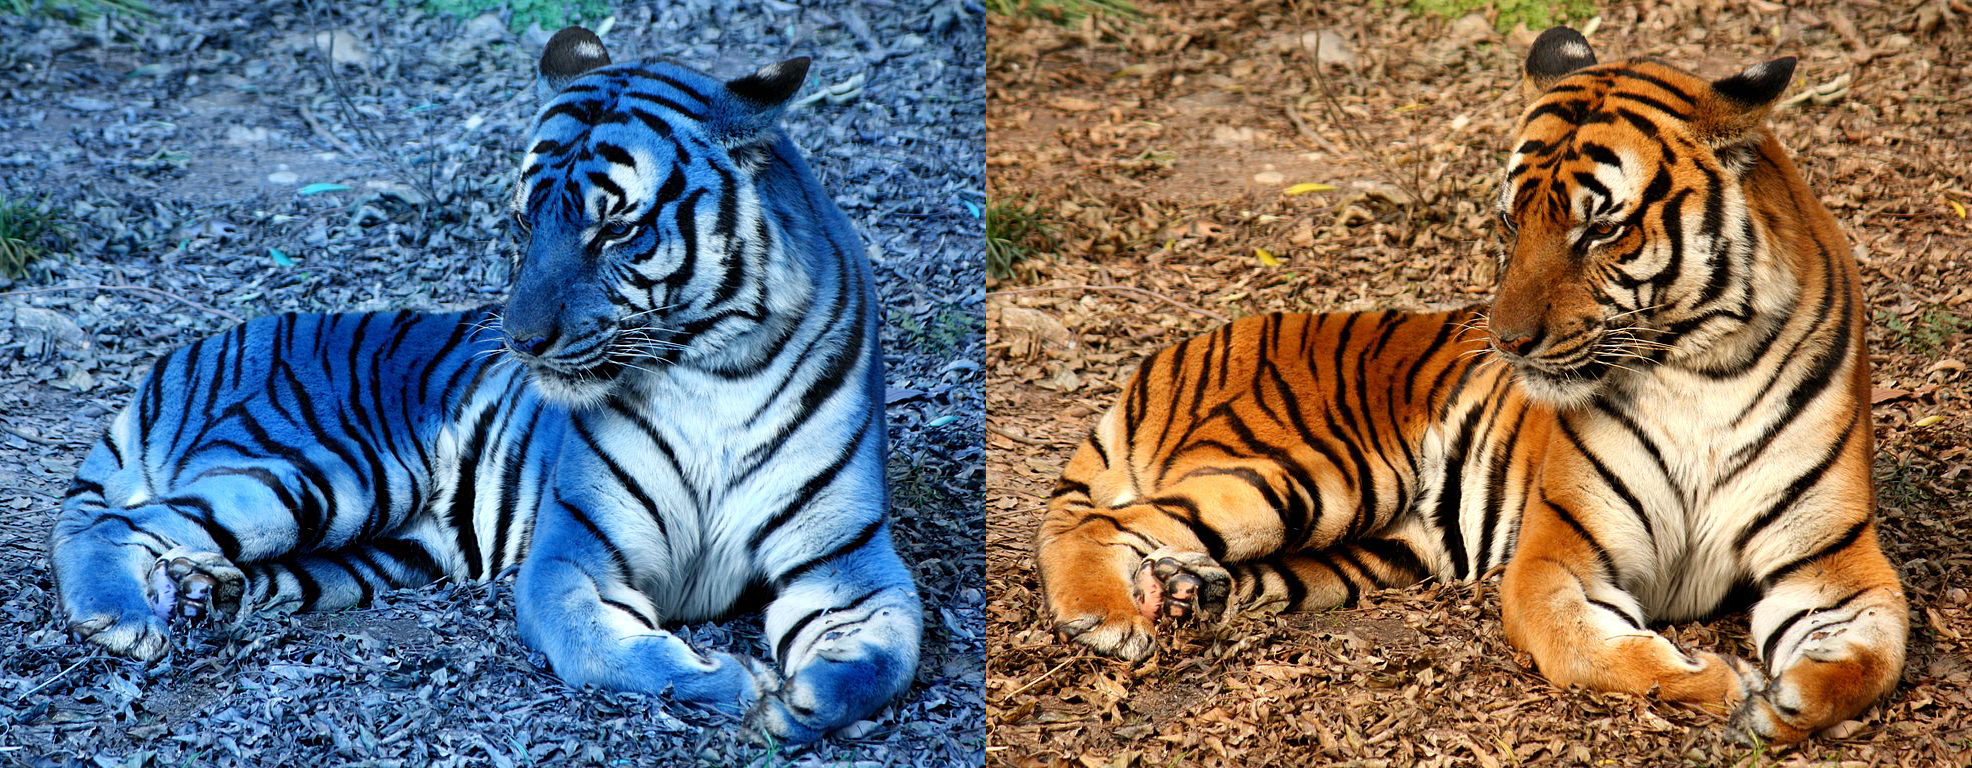

In [ ]:
urls = ["https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/2012_Suedchinesischer_Tiger.JPG/986px-2012_Suedchinesischer_Tiger.JPG"]  
# Lectura de una imagen con OpenCV

for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

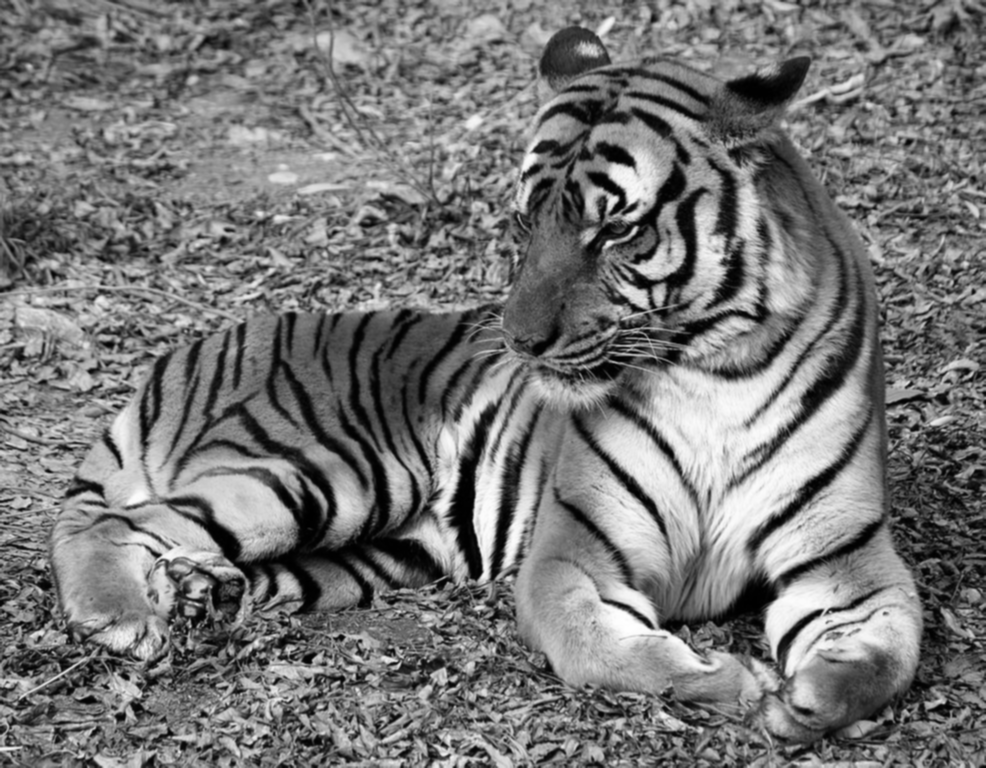

In [ ]:
# Conversión a escala de grises
img_gray = cv.cvtColor(image_2, cv.COLOR_BGR2GRAY)
# Difuminación de la imagen para una mejor detección de bordes
img_blur = cv.GaussianBlur(img_gray, (3,3), 0)
cv2_imshow(img_blur)


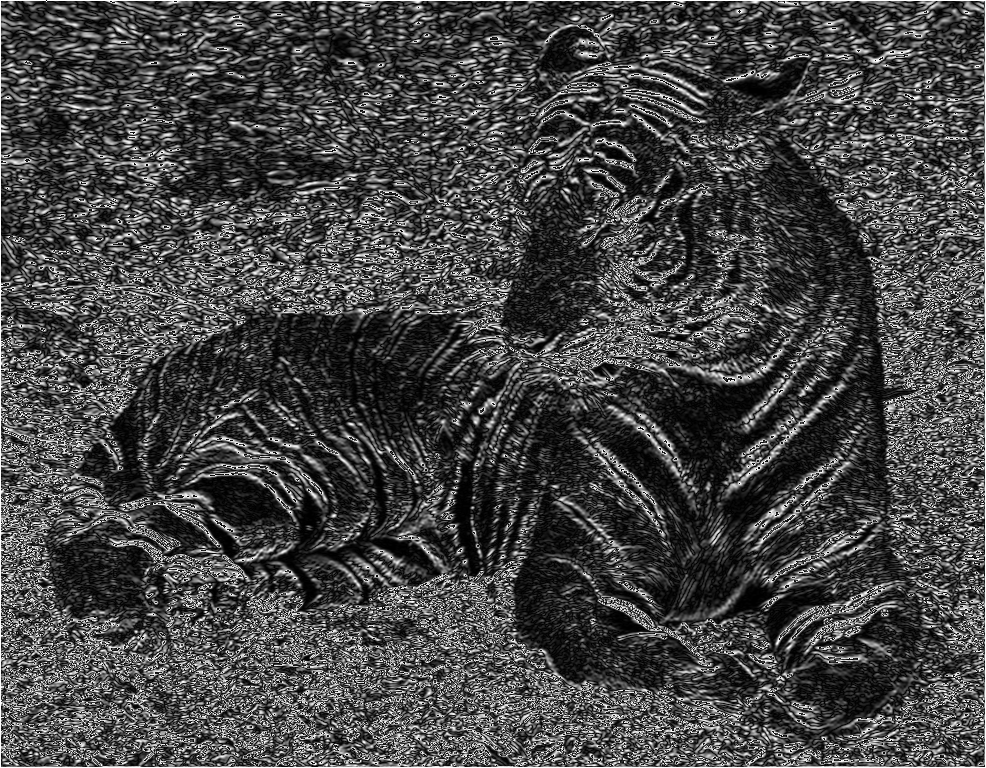

In [ ]:
img_answer=cv.cvtColor( image_2, cv.COLOR_BGR2GRAY )
height = np.size(img_blur, 0)
width = np.size(img_blur, 1)
kernel_mat=(np.array([[1,2,1],[0,0,0],[-1,-2,-1]]))

for i in range (1,height-1):
    for j in range (1,width-1):
        x=img_blur[i+1,j-1]*kernel_mat[2,0]+img_blur[i+1,j]*kernel_mat[2,1]+img_blur[i+1,j+1]*kernel_mat[2,2]+(img_blur[i-1,j-1]*kernel_mat[0,0]+img_blur[i-1,j]*kernel_mat[0,1]+img_blur[i-1,j+1]*kernel_mat[0,2])
        y=(img_blur[i-1,j+1]*kernel_mat[0,2]+img_blur[i,j+1]*kernel_mat[1,2]+img_blur[i+1,j+1]*kernel_mat[2,2])+(img_blur[i-1,j-1]*kernel_mat[0,0]+img_blur[i,j-1]*kernel_mat[1,0]+img_blur[i+1,j-1]*kernel_mat[2,0])
        img_answer[i-1,j-1]=sqrt(x**2+y**2)

contour,hier=cv.findContours(img_answer,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img_answer,contour,-1,(255,0,0),1)

cv2_imshow(img_answer)